## Найдем ТОП 3 сотрудника который указываются в качестве редактора чаще остальных и выведем их ID
````sql
SELECT 
   TOP (3)
       E_ID
  FROM EDITORS
 GROUP BY E_ID
 ORDER BY COUNT(*) DESC;

````


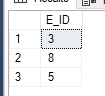

## Найдем среднее время выполнения заказа.
````sql
SELECT 
	   AVG(DATEDIFF(day, O_DATE, O_READY)) AS 'Выполнение заказа в среднем'
  FROM ORDERS;

````


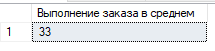

## Определим ТОП 3 клиента, по частоте заказов
````sql
SELECT 
   TOP (3)
	   O_COMPANY
  FROM ORDERS
 GROUP BY O_COMPANY
 ORDER BY COUNT(*) DESC;
 

````


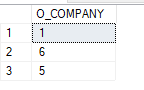

## Определим ТОП 3 книги, по  объему заказов
````sql
SELECT 
   TOP (3)
       B_ID,
	   SUM(B_COUNT) AS COUNT
  FROM ITEMS
 GROUP BY B_ID
 ORDER BY COUNT DESC;

````


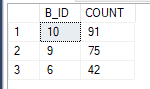

## Определим самый первый выполненный заказ 
````sql
SELECT 
   TOP (1)
	   *
  FROM ORDERS
 ORDER BY O_READY;

````


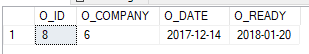

##  Подзапросы и вложенные запросы

## Определим продажи какой книги максимальны (продаем больший объем)
````sql
SELECT 
	   *
  FROM BOOKS
 WHERE B_CONTRACT = 
( SELECT
	 TOP (1)
	     B_ID
    FROM ITEMS
   GROUP BY B_ID
   ORDER BY SUM(B_COUNT) DESC
);

````


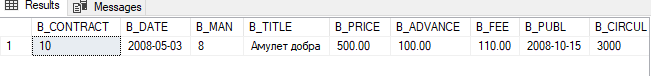

## Найдем самую дорогую книгу с использование вложенного запроса
````sql
SELECT *
  FROM BOOKS
 WHERE B_PRICE = 
(
	SELECT MAX(B_PRICE)
	  FROM BOOKS
);


````


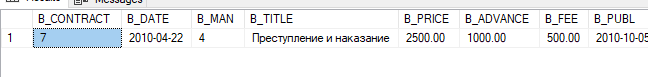

## Вывести ID книг их количество проданное в 2018 году, в порядке уменьшения объема продаж
````sql
SELECT B_ID,
	   SUM(B_COUNT) AS TOTAL
  FROM ITEMS
 WHERE O_ID IN 
(
	SELECT O_ID
	  FROM ORDERS
	 WHERE YEAR(O_READY) = '2018'
)
 GROUP BY B_ID
 ORDER BY TOTAL DESC;

````


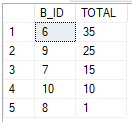